# Angular Model Demo: 1 Dimension (1 Qubit)

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qrobot.models import AngularModel

/home/davidelanza/.venv/lib/python3.8/site-packages/qiskit/__init__.py:72: RuntimeWarning: Could not import the IBMQ provider from the qiskit-ibmq-provider package. Install qiskit-ibmq-provider or check your installation.
  warnings.warn('Could not import the IBMQ provider from the '


In this notebook we present a 1-dimensional ($n=1$) demo for the `AngularModel` class.

In [2]:
n = 1

Here, we considered a time window of $\tau > 1$.

In [3]:
tau = 30

## Input definition

We start by defining an arbirary input sequence:

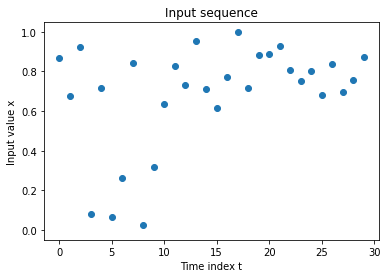

In [4]:
sequence = list()

# Balanced events (between 0 and 1)
for i in range(0, int(tau/2)):
    sequence.append(np.random.randint(0,1000)/1000)
    
# Unbalanced events (balanced between .5 and 1)
for i in range(int(tau/2), tau):
    sequence.append(np.random.randint(500,1000)/1000)
    
plt.figure()
plt.stem(sequence, use_line_collection=True, linefmt="w", basefmt="w")
plt.xlabel("Time index t")
plt.ylabel("Input value x")
plt.title("Input sequence")
plt.show()

## Encode the input in the model

We initialize the model by instantiating an object with $n$ and $\tau$

In [5]:
model = AngularModel(n,tau)

Using the `encode` method, we can encode each event's data in the model (for multidimensional inputs, a second loop is needed in order to loop through the $n$ dimensions of the input).

In [7]:
model.clear() # to re-initialize the model (allows re-runing this cell without double the encoding)

for t in range(0,model.tau): # loop throug the event sequence
    model.encode(sequence[t],dim=0)

The model is implemented by a Qiskit quantum circuit:

In [8]:
model.print_circuit()

     ┌──────────────┐┌──────────────┐┌──────────────┐┌───────────────┐»
q_0: ┤ RY(0.091106) ├┤ RY(0.070581) ├┤ RY(0.096761) ├┤ RY(0.0084823) ├»
     └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
c_0: ═════════════════════════════════════════════════════════════════»
                                                                      »
«     ┌──────────────┐┌───────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ RY(0.075084) ├┤ RY(0.0065973) ├┤ RY(0.027332) ├┤ RY(0.088174) ├»
«     └──────────────┘└───────────────┘└──────────────┘└──────────────┘»
«c_0: ═════════════════════════════════════════════════════════════════»
«                                                                      »
«     ┌───────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ RY(0.0024086) ├┤ RY(0.033301) ├┤ RY(0.066602) ├┤ RY(0.086708) ├»
«     └───────────────┘└──────────────┘└──────────────┘└──────────────┘»
«c_0: ══════════════════════════════════════════════════

Given the input we defined above, the model is in the following state:

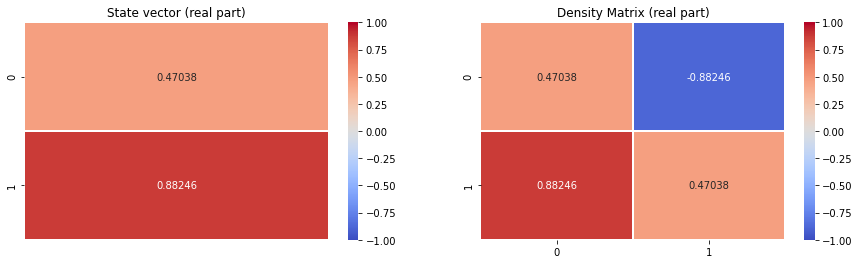

In [9]:
model.plot_state_mat()

**Density matrix** (from [Wikipedia](https://en.wikipedia.org/wiki/Density_matrix)): or a finite-dimensional function space, the most general density operator is of the form

$$\rho =\sum _{j}p_{j}|\psi _{j}\rangle \langle \psi _{j}|$$

where the coefficients $p_{j}$ are non-negative and add up to one, and $|\psi _{j}\rangle \langle \psi _{j}|$ is an outer product written in bra-ket notation. This represents a mixed state, with probability $ p_{j}$ that the system is in the pure state $|\psi _{j}\rangle $.

## Measurement simulation

We simulate `shots` measurements, and then we extract the relative frequencies for the two possible basis state outcomes $\lvert 0 \rangle ,\lvert 1 \rangle $.

In [10]:
shots = 1000000
counts = model.measure(shots)

Raw counts for each possible outcome:

In [11]:
import json
print("Aggregated binary outcomes of the circuit:")
print(json.dumps(counts, sort_keys=True, indent=4))

Aggregated binary outcomes of the circuit:
{
    "0": 221601,
    "1": 778399
}


From the raw counts we can obtain the relative frequencies (aka the probabilities) and compare them with the input sequence shape:

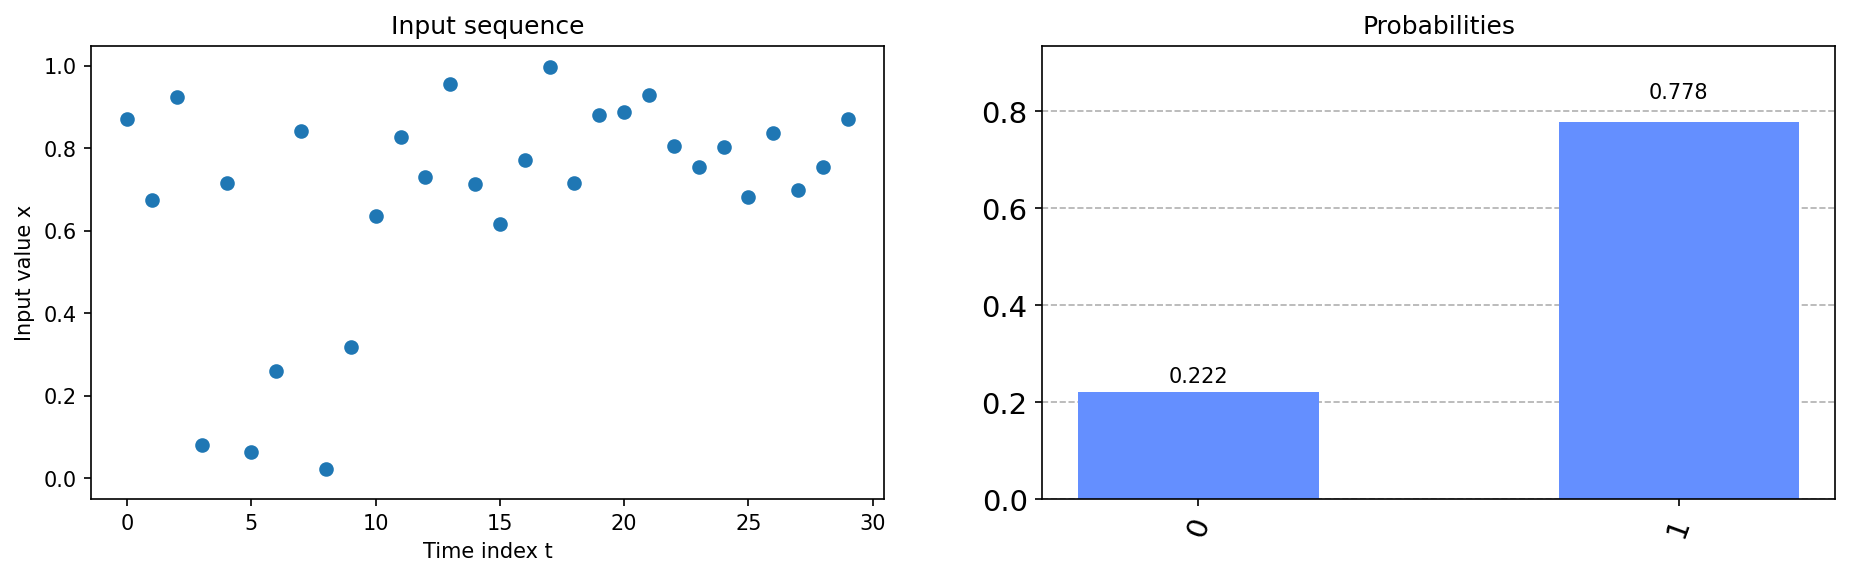

In [12]:
plt.figure(figsize=(15,4), dpi=150)

ax1 = plt.subplot(1,2,1)
ax1.stem(sequence, use_line_collection=True, linefmt="w", basefmt="w")
ax1.set_xlabel("Time index t")
ax1.set_ylabel("Input value x")
ax1.set_title("Input sequence")

ax2 = plt.subplot(1,2,2)
plot_histogram(counts, ax = ax2)
ax2.set_ylabel("")
ax2.set_title("Probabilities")

plt.show()